In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定


<Figure size 432x288 with 0 Axes>

In [2]:

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict'):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()

    if boundary:
        level = [0.5]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [3]:
from sklearn.datasets import make_blobs


In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=8)
clf.max_depth = 1

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [7]:
clf = RandomForestClassifier(random_state=8)

In [8]:
scores = []
n_range = range(1,100,10)
for n in n_range:
    clf.n_estimators = n
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{0} trees".format(n), score)
    scores.append(score)
scores = np.array(scores)

1 trees 0.8859649122807017
11 trees 0.9736842105263158
21 trees 0.9736842105263158
31 trees 0.9824561403508771
41 trees 0.9824561403508771
51 trees 0.9736842105263158
61 trees 0.9736842105263158
71 trees 0.9736842105263158
81 trees 0.9736842105263158
91 trees 0.9736842105263158


Text(0.5, 0, 'number of estimators')

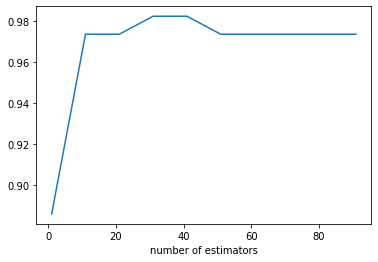

In [9]:
plt.plot(n_range, scores)
plt.xlabel("number of estimators")

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [11]:
scores2 = []
n_range = range(1,100, 10)
for n in n_range:
    clf.n_estimators=n
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print("{0} trees".format(n), score)
    scores2.append(score)
scores2 = np.array(scores2)

1 trees 0.8859649122807017
11 trees 0.9736842105263158
21 trees 0.9736842105263158
31 trees 0.9824561403508771
41 trees 0.9824561403508771
51 trees 0.9736842105263158
61 trees 0.9736842105263158
71 trees 0.9736842105263158
81 trees 0.9736842105263158
91 trees 0.9736842105263158


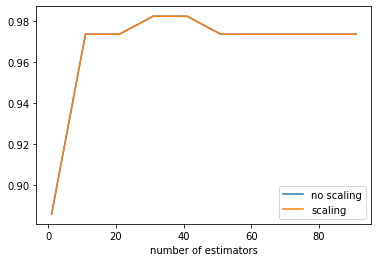

In [12]:
plt.plot(n_range, scores, label="no scaling")
plt.plot(n_range, scores2, label="scaling")
plt.xlabel("number of estimators")
plt.legend(loc="best")